In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv,norm,det,eigh
from ipywidgets import interact
%matplotlib inline

# ３章　線形回帰

データ集合$\{x_i\}$から目標$\{t_i\}$を予測する。

## 3.1 線形基底関数モデル

---

単純に$x_i$について線形結合するのは「線形回帰」

$$ y(\vec{x},\vec{w}) = w_0 + w_1x_1 + ... + w_Dx_D $$

ここでは、$x_i$ について**<font color="DarkOrange">非線形な関数の線形結合</font>**を考えよう。

$$ y(\vec{x},\vec{w}) = w_0 + \sum_{j=1}^{M-1}w_j \phi_j (\vec{x}) $$

これは、パラメータ$w$についての線形結合なので、「**<font color="DarkOrange">線形モデル</font>**」となる！

$w_0$は鬱陶しいので、$\phi_0(\vec{x}) = 1$ とすれば、

$$ y(\vec{x},\vec{w}) = \vec{w}^T \vec{\phi} (\vec{x}) $$

>ただし、
$$ \vec{x} =
      \left(\begin{array}{c}
            x_0 \\
            \vdots \\
            x_D \\
      \end{array}\right) \quad
    \vec{w} =
      \left(\begin{array}{c}
            w_0 \\
            \vdots \\
            w_{M-1} \\
      \end{array}\right) \quad
    \vec{\phi} =
      \left(\begin{array}{c}
            \phi_0 \\
            \vdots \\
            \phi_{M-1} \\
      \end{array}\right) \quad
$$  
$w_0$は「**<font color="DarkOrange">バイアスパラメータ</font>**」、$\phi_j(\vec{x})$は「**<font color="DarkOrange">基底関数</font>**」と呼ぶ。


### 基底関数の例

---


1. ガウス基底関数

 $\phi_j (\vec{x}) = \exp \{-\frac{(x-\mu)^2}{2s^2}\}$

2. シグモイド基底関数

 $\phi_j (\vec{x}) = \frac {1}{1+\exp(\frac{x-\mu_j}{s})} = \sigma(\frac{x-\mu_j}{s})$

3. フーリエ基底関数

 $\phi_j (\vec{x}) = \exp(jnkx)$



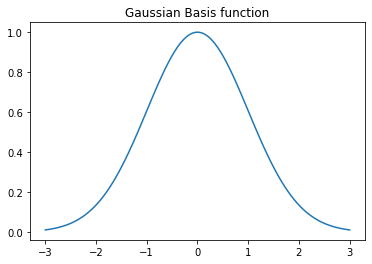

In [0]:
# Gaussian Basis function
def GBF(x,m,s):
    return np.exp(-(x - m)**2/(2*(s)**2))

X = np.linspace(-3,3,100)
M,S = 0,1
plt.plot(X,GBF(X,M,S))
plt.title("Gaussian Basis function")
plt.show()

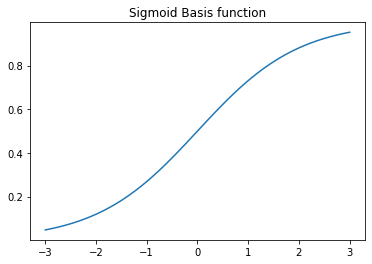

In [0]:
# Sigmoid Basis fuction
def SBF(x,m,s):
    return 1 / (1 + np.exp(-(x-m)/s))

X = np.linspace(-3,3,100)
M,S = 0,1
plt.plot(X,SBF(X,M,S))
plt.title("Sigmoid Basis function")
plt.show()

### 最尤推定：最小二乗法で尤もらしい回帰モデルを推定しよう

---



$$ t = y(\vec{x},\vec{w}) + \varepsilon = (決定論的関数) + (ガウスノイズ) $$

目標変数$t$は決定論的関数とガウスノイズの和で表されるとしよう。

$\varepsilon \sim \mathcal{N}(\varepsilon |0,\beta^{-1})$ なので、

$$p(t|\vec{x},\vec{w},\beta) = \mathcal{N}(t|y(\vec{x},\vec{w}),\beta^{-1})$$

と表される。また、新たな$\vec{x_{new}}$に対する予測値は、$t$の条件付き期待値で与えられて、

$$\mathbb{E}[t|\vec{x_{new}}] = \int t p(t|\vec{x_{new}})dt = y(\vec{x_{new}}|\vec{w})$$

つまり、予測値は$\vec{x_{new}}$を**<font color="DarkOrange">決定論的関数に代入する</font>**ことで得られる。


次に、データ集合を考える。

$Data = \{\vec{x_1}, \ldots ,\vec{x_N}\}, \vec{t} = (t_1,...,t_N)$ とするとき、

$$ p(\vec{t}|Data,\vec{w},\beta) = \prod_{ n = 1 }^N \mathcal{N}(t_n|\vec{w}^T\vec{\phi}(\vec{x_n}),\beta^{-1})
$$

$$
\therefore \ \ln p(\vec{t}|\vec{w},\beta) = \sum_{ n = 1 }^N \ln \mathcal{N}(t_n|\vec{w}^T\vec{\phi}(\vec{x_n}),\beta^{-1}) \\
　　　　　　　　 = \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi)-\beta E_D(\vec{w})
$$

ただし、**最小二乗誤差**は、$E_D(\vec{w})=\frac{1}{2} \sum_{n=1}^N\{t_n - \vec{w}^T\vec{\phi}(\vec{x_n})\}^2$


最尤推定をするために、**<font color="DarkOrange">$\vec{w}$について最大化</font>**する。  

$\vec{w}$ に関するのは $E_D(\vec{w})$ で、**これを最小化**すればよい。

$$\nabla \ln p(\vec{t}|\vec{w},\beta) = 0 \\
\therefore \ \beta \sum_{n=1}^N \{
    t_n - \vec{w}^T\vec{\phi}(\vec{x_n})
    \}\vec{\phi}(\vec{x_n})^T = 0 \\
\therefore \ \sum_{n=1}^N t_n \vec{\phi}^T - \vec{w}^T(\sum_{n=1}^N\vec{\phi} \cdot \vec{\phi}^T) = 0 \\
\therefore \ \vec{w_{ML}} = (\sum_{n=1}^N\vec{\phi} \cdot \vec{\phi}^T)^{-1}\sum_{n=1}^N\vec{\phi} \ t_n \\
$$

これは、**<font color="DarkOrange">正規方程式</font>**と呼ばれ、計画行列$\Phi$・ペンローズの疑似逆行列$\Phi^\dagger$を用いて表すことができる。

$$ \vec{w_{ML}} = (\Phi^T\Phi)^{-1}\Phi^T\vec{t} = \Phi^\dagger \vec{t} $$


> ただし、
\begin{eqnarray}
\Phi = \left(
  \begin{array}{ccc}
    \phi_1(\vec{x_1}) & \ldots & \phi_{M-1}(\vec{x_1})\\
    \vdots  & \ddots & \vdots \\
    \phi_1(\vec{x_N})  & \ldots & \phi_{M-1}(\vec{x_N})
  \end{array}
\right)
\end{eqnarray}

In [0]:
# 基底関数の実装
def phi(mus, x):
    ret = np.array([np.exp(-(x-mu)**2/(2*0.1**2)) for mu in mus])
    ret[0] = 1
    return ret

# 正規方程式を解く
def solve(mus,x_train,y_train,N,m):
    # 計画行列(3.16式)の計算
    PHI = np.array([phi(mus,x) for x in x_train]).reshape(N,m)
    # 最尤推定解(3.15式)の計算
    w_ml = inv(PHI.transpose().dot(PHI)).dot(PHI.transpose()).dot(y_train)
    return w_ml

# 真の関数はsin()
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

@interact(M=(2,10))
def plot(M):
    ary_mu = np.linspace(0,1,M)

    f,ax = plt.subplots(1,3,figsize=(10,3))

    for i,N in enumerate([10,20,30]):
        ax[i].plot(x_real,y_real,'g-')

        x_train = np.linspace(0,1,N)
        y_train = np.sin(2*np.pi*x_train) + np.random.normal(0,0.3,N)
        ax[i].scatter(x_train,y_train,)

        w_ml = solve(ary_mu,x_train,y_train,N,M)

        x_range = np.linspace(0,1,100)
        ax[i].plot(x_range,[phi(ary_mu,x).dot(w_ml) for x in x_range],'r-')
        ax[i].set_title('N={}'.format(N))

interactive(children=(IntSlider(value=6, description='M', max=10, min=2), Output()), _dom_classes=('widget-int…

### バイアスパラメータ $w_0$ の役割

---



$E_D(\vec{w})$を$w_0$について最大化してみる。$w_0$を明示すると、

$$E_D(\vec{w})= \frac{1}{2} \sum_{n=1}^N\{t_n - w_0 - \sum_{j=1}^{M-1}w_j \phi_j (\vec{x_n})\}^2$$

となるので、$\frac{\partial E_D}{\partial w_0} = 0$ としたとき、

$$
w_0 = \frac{1}{N} \sum_{n=1}^N t_n - 
\sum_{j=1}^{M-1} (w_j \frac{1}{N} \sum_{n=1}^N \phi_j (\vec{x_n})) = \bar{t} - \sum_{j=1}^{M-1} w_j \bar{\phi_j}
$$

したがって、

$$
w_0 = (目標値の平均) - (基底の平均の重み付き線形和) $$

となるため、$w_0$はこの２つの差を埋める働きをしていることがわかる。


### ノイズの精度 $\beta$ の役割

---



同様に、$\frac{\partial E_D}{\partial \beta} = 0$ としたとき、

$$
\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^N\{t_n-\vec{w_{ML}}^T\vec{\phi}(\vec{x_n})\}^2 
$$

したがって、
$$
\frac{1}{\beta_{ML}} = (残差の分散)
$$

となるため、$\beta$は残差の精度を表していることがわかる。

### 最小二乗法の意味

---



回帰関数は、M個の基底関数によって作られるM次元空間上の点となる。

よって、最小二乗誤差は、

$$
E_D = \frac{1}{2} \left\|{
\left(\begin{array}{c}
            t_1 \\
            \vdots \\
            t_N \\
      \end{array}\right)
-
\left(\begin{array}{c}
            y(\vec{x_1},\vec{w}) \\
            \vdots \\
            y(\vec{x_N},\vec{w}) \\
      \end{array}\right)}
\right\|^2 
$$

と表され、目標値と回帰関数の**<font color="DarkOrange">M次元空間上のユークリッド距離</font>**となる。

### 逐次学習（オンライン学習）

---



大規模データの時は、一つずつデータを使ってパラメータを更新していくことが多い。

このときの更新式は、

$$
\vec{w}^{(t+1)} = \vec{w}^{(t)} + \eta\nabla E_n
$$

とすればよい。この手法は、確率的勾配化法とも呼ばれている。

### 正則化最小二乗法

---



$\Phi^T\Phi$が非正則に近いとき、逆行列が計算しにくくなって、正規方程式が不安定となってしまう。

これを防ぐために、誤差関数に正則化項を追加して、正規性を保つようにすることがある。

二乗誤差では、

$$E = \frac{1}{2} \sum_{n=1}^N\{t_n - \vec{w}^T\vec{\phi}(\vec{x_n})\}^2 + \frac{\lambda}{2} \vec{w} \cdot \vec{w}^T$$

という誤差を用いる。このときの最尤推定値は、

$$
 \vec{w_{ML}} = (\lambda I + \Phi^T\Phi)^{-1}\Phi^T\vec{t} 
$$

となる。この手法は「荷重減衰」や「パラメータ縮小推定」と呼ばれている。



In [0]:
def phi(mus, x):
    ret = np.array([np.exp(-(x-mu)**2/(2*0.1**2)) for mu in mus])
    ret[0] = 1
    return ret

def solve(mus,x_train,y_train,N,m,l_):
    PHI = np.array([phi(mus,x) for x in x_train]).reshape(N,m)
    # 正則化項を加える
    w_ml = inv(l_*np.identity(m)+PHI.transpose().dot(PHI)).dot(PHI.transpose()).dot(y_train)
    return w_ml

x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

@interact(M=(2,10),l=(10,100))
def plot(M,l):
    ary_mu = np.linspace(0,1,M)
    l *= 0.01

    f,ax = plt.subplots(1,3,figsize=(10,3))

    for i,N in enumerate([10,20,30]):
        ax[i].plot(x_real,y_real, 'g-')

        x_train = np.linspace(0,1,N)
        y_train = np.sin(2*np.pi*x_train) + np.random.normal(0,0.3,N)
        ax[i].scatter(x_train,y_train,)

        w_ml = solve(ary_mu,x_train,y_train,N,M,l)

        x_range = np.linspace(0,1,100)
        ax[i].plot(x_range,[phi(ary_mu,x).dot(w_ml) for x in x_range],'r-')
        ax[i].set_title('N={}'.format(N))

interactive(children=(IntSlider(value=6, description='M', max=10, min=2), IntSlider(value=55, description='l',…

## 3.2 バイアスーバリアンス分解：モデルの複雑さの問題

---





モデルの複雑さの問題として... **<font color="DarkOrange">バイアス-バリアンスのトレードオフ</font>**

損失関数：二乗損失関数  $L={(t-y( \vec{x}))}^2 $

最適な予測：条件付き期待値 $h(\vec{x})
=\mathbb{E}[t|\vec{x}]=\int t p(t|\vec{x})dt$





二乗損失の期待値を計算しよう。

$$
\mathbb{E}[L] = \int \{y(\vec{x})-h(\vec{x})\}^2 p(\vec{x})d\vec{x} \
+ \int \int \{h(\vec{x})-t\}^2 p(\vec{x},t) d\vec{x} dt
$$

一項目から、
$$
\{y(\vec{x};D)-h(\vec{x})\}^2
= \{y(\vec{x};D)-\mathbb{E}_D[y(\vec{x};D)]+\mathbb{E}_D[y(\vec{x};D)]-h(\vec{x})\}^2 \\
= (y-\mathbb{E}_D)^2+(\mathbb{E}_D-h)^2+2(y-\mathbb{E}_D)(\mathbb{E}_D-h)
$$

$$
\therefore \ \mathbb{E}_D[\{y(\vec{x};D)-h(\vec{x})\}^2] 
= (\mathbb{E}_D-h)^2 + \mathbb{E}_D[(y-\mathbb{E}_D)^2]
$$


以上から、$$二乗損失の期待値＝(バイアス)^2+(バリアンス)+(ノイズ)$$

となるため、**<font color="DarkOrange">バイアス</font>**と**<font color="DarkOrange">バリアンス</font>**を**<font color="DarkOrange">バランスよく小さくする</font>**ことで、過学習を防ぐことができる！

## 3.3 ベイズ線形回帰

---



ベイズ的に扱うことで、モデルの複雑さを回避する。

**Liklihood** : $ p(\vec{t}|\vec{w}) = \prod_{ n = 1 }^N  \mathcal{N}(t_n|\vec{w}^T\vec{\phi}(\vec{x_n}),\beta^{-1})$  

**Prior** : $ p(\vec{w})=\mathcal{N}(\vec{w}|m_0,S_0)$  

**Posterior** : $ p(\vec{w}|\vec{t}) \propto p(\vec{t}|\vec{w})p(\vec{w})$

したがって、今までの結論から、
$$
 p(\vec{w}|\vec{t}) = \mathcal{N}(\vec{w}|\vec{m_N},S_N)
$$


ただし、
$
  \left\{
    \begin{array}{l}
      \vec{m_N}=S_N(S_0^{-1}m_0+\beta\Phi^T\vec{t}) \\
      S_N = S_0^{-1}+\beta\Phi^T\Phi
    \end{array}
  \right.
$　となる。

簡単にするため、等方的ガウス分布を用いて、

$$p(\vec{w})=p(\vec{w}|\alpha)=\mathcal{N}(\vec{w}|0,\alpha^{-1}I)$$

とすると、

$$
  \left\{
    \begin{array}{l}
      \vec{m_N}=\beta S_N\Phi^T\vec{t} \\
      S_N = \alpha I+\beta\Phi^T\Phi
    \end{array}
  \right.
$$

となるので、事後分布の対数は、

$$\ln p(\vec{w}|\vec{t}) = - \left[ \frac{\beta}{2}
\sum_{n=1}^N \{ t_n -\vec{w}^T\vec{\phi} \} 
+\frac{\alpha}{2}\vec{w}^T\vec{w} \right] + (定数)$$

となるので、事後分布を最大化するためには、[　]内を最小化すればよい。

### 予測分布：新しい $\vec{x}$ に対する $t$ の確率分布（不確かさ） を予測する。

---



$$p(t_{new}|\vec{t};\alpha,\beta)= \int p(t_{new}|\vec{w};\beta)p(\vec{w}|\vec{t};\alpha,\beta) d \vec{w}$$
$$= \mathcal{N}(t_{new}|\vec{m_N}^T \vec{\phi}(x_{new}),\sigma_N^2(x_{new}) )$$

ただし、$\sigma_N^2(x_{new})=\frac{1}{\beta}+\vec{\phi}^T S_N \vec{\phi}$
となり、これは（ノイズ）+（$\vec{w}$の不確かさ）を表している。

▷ **<font color="DarkOrange">データ点の近傍で不確かさは最小となる。データ数を増やせば不確かさが減る。</font>**


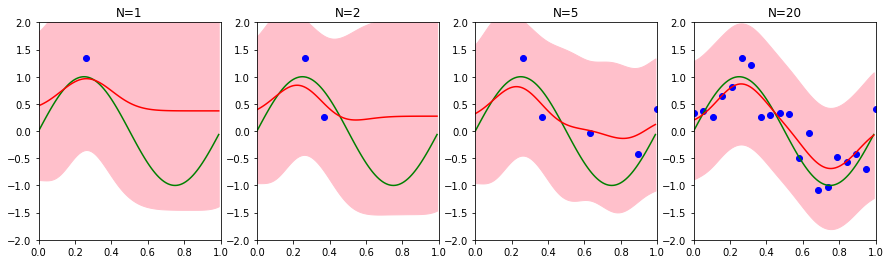

In [0]:
alpha=1.0
beta=1.0
N = 20
M = 10
ary_mu = np.linspace(0,1,M)

x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

x_train = np.linspace(0,1,N)
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(0,0.3,N)

def phi(mus, x):
    ret = np.array([np.exp(-(x-mu)**2/(2*0.1**2)) for mu in mus])
    ret[0] = 1
    return ret

def pred(x_train, y_train,ax):
    N = x_train.shape[0]
    PHI = np.array([phi(ary_mu,x) for x in x_train]).reshape(N,M)

    S = inv(alpha * np.identity(M) + beta * (PHI.T).dot(PHI))
    m = beta * (S.dot(PHI.T).dot(y_train.T))

    PHI_real = np.array([phi(ary_mu,x) for x in x_real]).reshape(100,M)
    pred_mean = PHI_real.dot(m)
    pred_std = np.sqrt(1.0/beta + np.diag(PHI_real.dot(S).dot(PHI_real.T)))

    ax.plot(x_train, y_train, 'bo')
    ax.plot(x_real, y_real, 'g-')
    ax.plot(x_real, pred_mean, 'r-')
    ax.fill_between(x_real, pred_mean+pred_std, pred_mean-pred_std, color='pink')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(-2, 2)
    ax.set_title("N={}".format(N))

f,axes = plt.subplots(1,4,figsize=(15,4))
r = np.arange(N)
np.random.shuffle(r)
for i,k in enumerate((1, 2, 5, N)):
    indices = np.sort(r[0:k]) 
    pred(x_train[indices], y_train[indices],axes[i])

### 等価カーネル（平滑化行列）

---



今までの結果を回帰式に代入すると、

$$y(\vec{x},\vec{m_N}) = \vec{m_N}^T\vec{\phi} = \beta \vec{\phi}S_N\Phi^T\vec{t}=\sum_{n=1}^N \beta \vec{\phi}S_N\phi(\vec{x_n})t_n$$

$$\therefore y(\vec{x},\vec{m_N})=\sum_{n=1}^Nk(\vec{x},\vec{x_n})t_n$$

と表せる。この$k(\vec{x},\vec{x_n})$を**<font color="DarkOrange">等価カーネル</font>**といい、2つ以上の$x$に対する$y$の事後分布同士の不確かさを決める。



## 3.4 ベイズモデル比較

---


点推定の代わりに**<font color="DarkOrange">周辺化</font>**によってモデルのハイパーパラメータを評価する。

Ｌ個の $Model = \{M_1, \ldots ,M_L\}$ に対し、あるモデルの不確かさはモデルの事後分布で評価される。

$$p(M_i|Data)=p(M_i)p(Data|M_i)$$

このとき、$p(Data|M_i)$を**<font color="DarkOrange">モデルエビデンス</font>**といい、モデル空間におけるデータの周辺尤度となっている。

> $\frac{p(Data|M_j)}{p(Data|M_k)}$はベイズ因子と呼ばれ、仮説検定におけるエビデンスの強さを評価するのに使われている。

事後分布が求まれば、予測分布は以下のように求められる。

$$p(t|\vec{x},Data)=\sum_{i=1}^Lp(t|\vec{x},M_i,Data)p(M_i|Data)$$

①モデルエビデンスの解釈１

パラメータを事前分布からランダムにサンプリングしたときに、観測データが生成する確率。

$$p(Data|M_i)=\int p(Data|\vec{w},M_i)p(\vec{w}|M_i)d\vec{w}$$

②モデルエビデンスの解釈２

$p(Data|M_i)$は、あるパラメーターの最頻値$w_{MAP}$で尖っているとき、

$$
  \left\{
    \begin{array}{l}
      \int p(Data|w,M_i)dw \simeq p(Data|w_{MAP},M_i) \cdot \triangle w_{posterior}\\
      p(w|M_i)\simeq  \frac{1}{\triangle w_{prior}}
    \end{array}
  \right.
$$

となるので、モデルエビデンスは以下のようになる。

$$p(Data|M_i)\simeq p(Data|w_{MAP},M_i) \frac{\triangle w_{posterior}}{\triangle w_{prior}}$$

$$\therefore \ln p(Data|M_i)\simeq \ln p(Data|w_{MAP},M_i) + \ln ({\frac{\triangle w_{posterior}}{\triangle w_{prior}}})$$

第１項はデータへの適合度を表し、第２項はモデルの複雑さによるペナルティを表している。

## 3.5 エビデンス近似（経験ベイズ、第二種の最尤推定、一般化最尤推定）

---



**<font color="DarkOrange">フルベイズ的</font>**に扱うために、ハイパーパラメータ$\alpha,\beta$にも事前分布を導入する。  

$$p(t|\vec{t})=\iiint p(t|\vec{w},\beta)p(\vec{w}|\vec{t},\alpha,\beta)p(\alpha,\beta|\vec{t})d\vec{w}d\alpha d\beta$$

→ すべてのパラメータに対して解析的に周辺化することは難しい。  
→ パラメータ$\vec{w}$に関する周辺尤度を最大にするようにハイパーパラメータを決めよう。





ベイズの定理から $p(\alpha,\beta|\vec{t}) \propto p(\vec{t}|\alpha,\beta)p(\alpha,\beta)$ なので、$p(\vec{t}|\alpha,\beta)$を最大にする$\hat{\alpha},\hat{\beta}$を求める。（これは**<font color="DarkOrange">エビデンス関数</font>**と呼ばれる）

$$p(\vec{t}|\alpha,\beta)=\int p(\vec{t}|\vec{w},\beta)p(\vec{w}|\beta)d\vec{w}$$
$$=\left(\frac{\beta}{2 \pi}\right)^\frac{N}{2}\left(\frac{\alpha}{2 \pi}\right)^\frac{M}{2}\int \exp\{-E(\vec{w})\}d\vec{w}$$
$$=\left(\frac{\beta}{2 \pi}\right)^\frac{N}{2}\left(\alpha \right)^\frac{M}{2}|A|^{-\frac{1}{2}} \exp\{-E(\vec{m_N})\}$$

と変形できるので、これを最大にする$\hat{\alpha}, \hat{\beta}$を求める。


ここで、以前の結果から以下のようにしている。

$$E(\vec{w})=\frac{\beta}{2}||\vec{t}-\Phi\vec{w}||^2-\frac{\alpha}{2}\vec{w}^T\vec{w}=E(\vec{m_N})+\frac{1}{2}(\vec{w}-\vec{m_N})^TA(\vec{w}-\vec{m_N})$$

ただし、$
  \left\{
    \begin{array}{l}
      A=\alpha I + \beta \Phi^T \Phi = \nabla \nabla E(\vec{w}) ：ヘッセ行列\\
      \vec{m_N}=\beta A^{-1} \Phi^T \vec{t}
    \end{array}
  \right.$


### エビデンス関数の最大化

---


① $\alpha$について最大化

$(\beta \Phi^T \Phi)\vec{u}_i=\lambda_i \vec{u}_i$という固有方程式を考える。

$A=\alpha I + \beta \Phi^T \Phi$ だから、これは固有値$\alpha+\lambda_i$を持つことになるので、

$$\frac{d}{d\alpha} \ln|A|=\frac{d}{d\alpha} \sum_{i} \ln(\alpha+\lambda_i)=\sum_{i}\frac{1}{\alpha+\lambda_i}$$

となるので、エビデンス関数の$\alpha$に関する最大値（停留点）は、
$$\frac{d}{d\alpha} p(\vec{t}|\alpha,\beta) = 0$$

$$\therefore \frac{M}{2\alpha}-\frac{1}{2}\vec{m_N}^T\vec{m_N}-\frac{1}{2}\sum_{i}\frac{1}{\alpha+\lambda_i}= 0$$

$$\therefore \alpha = \frac{1}{\vec{m_N}^T\vec{m_N}} \left( M-\alpha\sum_{i}\frac{1}{\alpha+\lambda_i} \right) = 
\frac{1}{||m_N||^2} \sum_{i}\frac{\lambda_i}{\alpha+\lambda_i}$$

右辺は$\alpha$に依存するから、これは$\alpha$の陰関数。→$\alpha_0$から更新を繰り返して収束させる。

② $\beta$について最大化

$$\frac{d}{d\beta} \ln|A|=\frac{d}{d\beta} \sum_{i} \ln(\alpha+\lambda_i)
= \sum_{i} \frac{d\lambda_i}{d\beta}\frac{d}{d\lambda_i} \ln(\alpha+\lambda_i)
=\frac{1}{\beta}\sum_{i}\frac{\lambda_i}{\alpha+\lambda_i}$$

よって、エビデンス関数の$\beta$に関する最大値（停留点）は、

$$\frac{d}{d\beta} p(\vec{t}|\alpha,\beta) = 0$$

$$\therefore \frac{M}{2\beta}-\frac{1}{2}\sum_{n}\{t_n-\vec{m_N}^T\vec{\phi}\}^2
-\frac{1}{2\beta}\sum_{i}\frac{\lambda_i}{\alpha+\lambda_i}$$


$$\therefore \frac{1}{\beta}=\frac{1}{N-\sum_{i}\frac{\lambda_i}{\alpha+\lambda_i}}\sum_{n}\{t_n-\vec{m_N}^T\vec{\phi}\}^2$$

右辺は$\beta$に依存するから、これは$\beta$の陰関数。→$\beta_0$から更新を繰り返して収束させる。

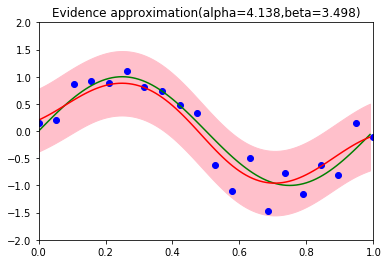

In [0]:
alpha=1.0
beta=1.0
N = 20
M = 10
tol=1e-4
maxiter=100
ary_mu = np.linspace(0,1,M)

x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

x_train = np.linspace(0,1,N)
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(0,0.3,N)

def opt(Phi,t,tol,maxiter,alpha,beta):
    tmp_lambdas = eigh((Phi.T).dot(Phi))[0]
    cnt = 0
    while cnt < maxiter:
        lambdas = beta * tmp_lambdas
        S_ = inv(alpha * np.identity(M) + beta * (Phi.T).dot(Phi))
        m_ = beta * (S_.dot(Phi.T).dot(t.T))

        alpha_old = alpha
        beta_old = beta

        gamma = np.sum(lambdas/(alpha+lambdas))
        alpha = gamma/np.dot(m_,m_)
        beta = (len(t) - gamma) / norm(t - Phi.dot(m_)**2)

        if (abs(alpha - alpha_old)<tol)and(abs(beta-beta_old)<tol):
            break
        cnt += 1
    return alpha,beta

def phi(mus, x):
    ret = np.array([np.exp(-(x-mu)**2/(2*0.1**2)) for mu in mus])
    ret[0] = 1
    return ret

def pred(x_train, y_train,alpha,beta,ax):
    N = x_train.shape[0]
    PHI = np.array([phi(ary_mu,x) for x in x_train]).reshape(N,M)
    
    alpha,beta=opt(PHI,y_train,tol,maxiter,alpha,beta)
    S = inv(alpha * np.identity(M) + beta * (PHI.T).dot(PHI))
    m = beta * (S.dot(PHI.T).dot(y_train.T))

    PHI_real = np.array([phi(ary_mu,x) for x in x_real]).reshape(100,M)
    pred_mean = PHI_real.dot(m)
    pred_std = np.sqrt(1.0/beta + np.diag(PHI_real.dot(S).dot(PHI_real.T)))

    ax.plot(x_train, y_train, 'bo')
    ax.plot(x_real, y_real, 'g-')
    ax.plot(x_real, pred_mean, 'r-')
    ax.fill_between(x_real, pred_mean+pred_std, pred_mean-pred_std, color='pink')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(-2, 2)
    ax.set_title('Evidence approximation(alpha={},beta={})'.format(round(alpha,3),round(beta,3)))

f,ax = plt.subplots(1,1,figsize=(6,4))
pred(x_train, y_train,alpha,beta,ax)

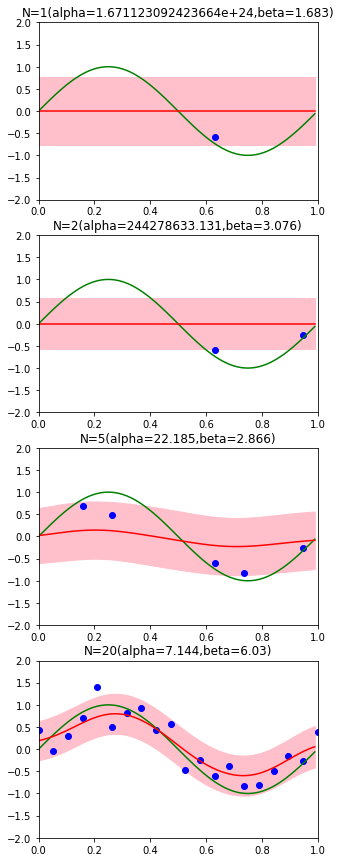

In [0]:
alpha=1.0
beta=1.0
N = 20
M = 10
tol=1e-4
maxiter=100
ary_mu = np.linspace(0,1,M)

x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

x_train = np.linspace(0,1,N)
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(0,0.3,N)

def opt(Phi,t,tol,maxiter,alpha,beta):
    tmp_lambdas = eigh((Phi.T).dot(Phi))[0]
    cnt = 0
    while cnt < maxiter:
        lambdas = beta * tmp_lambdas
        S_ = inv(alpha * np.identity(M) + beta * (Phi.T).dot(Phi))
        m_ = beta * (S_.dot(Phi.T).dot(t.T))

        alpha_old = alpha
        beta_old = beta

        gamma = np.sum(lambdas/(alpha+lambdas))
        alpha = gamma/np.dot(m_,m_)
        beta = (len(t) - gamma) / norm(t - Phi.dot(m_)**2)

        if (abs(alpha - alpha_old)<tol)and(abs(beta-beta_old)<tol):
            break
        cnt += 1
    return alpha,beta

def phi(mus, x):
    ret = np.array([np.exp(-(x-mu)**2/(2*0.1**2)) for mu in mus])
    ret[0] = 1
    return ret

def pred(x_train, y_train,alpha,beta,ax):
    N = x_train.shape[0]
    PHI = np.array([phi(ary_mu,x) for x in x_train]).reshape(N,M)
    
    alpha,beta=opt(PHI,y_train,tol,maxiter,alpha,beta)
    S = inv(alpha * np.identity(M) + beta * (PHI.T).dot(PHI))
    m = beta * (S.dot(PHI.T).dot(y_train.T))

    PHI_real = np.array([phi(ary_mu,x) for x in x_real]).reshape(100,M)
    pred_mean = PHI_real.dot(m)
    pred_std = np.sqrt(1.0/beta + np.diag(PHI_real.dot(S).dot(PHI_real.T)))

    ax.plot(x_train, y_train, 'bo')
    ax.plot(x_real, y_real, 'g-')
    ax.plot(x_real, pred_mean, 'r-')
    ax.fill_between(x_real, pred_mean+pred_std, pred_mean-pred_std, color='pink')
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(-2, 2)
    ax.set_title('N={}(alpha={},beta={})'.format(N,round(alpha,3),round(beta,3)))

f,axes = plt.subplots(4,1,figsize=(5,15))
r = np.arange(N)
np.random.shuffle(r)
for i,k in enumerate((1, 2, 5, N)):
    indices = np.sort(r[0:k]) 
    pred(x_train[indices], y_train[indices],alpha,beta,axes[i])

### 有効パラメータ数

---



$\gamma=\sum_{i}\frac{\lambda_i}{\alpha+\lambda_i}$は、**<font color="DarkOrange">有効(well-determined)なパラメータの数</font>**
を表している。

$\alpha$を$0$に変化させると、$\gamma$は$M$に変化する  
→ $\alpha$は、$w_i$の大きさを制御し、$\gamma$はデータに制約されるパラメータの数を表している。  
→ $N>M$のとき（データ数がとても多い時）、すべての$w_i$がwell-determinedとなる。

## 3.6 固定された基底関数の限界

---



**<font color="DarkOrange">基底関数を固定する欠点：次元の呪い</font>**

一般的には、データ集合に助けられている。
- {$\vec{x}_n$} は、要素同士が強い相関を持ち、低次元の非線形多様体上に分布していることが多い
- {$t_n$} は、多様体上の少数の方向に強く依存していることが多い